In [1]:
using MDToolbox, PyPlot
PyPlot.plt.style.use("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

In [2]:
t = mdload("data/md_alad/3_prod/run.nc")

25000x22 TrjArray{Float64, Int64}
|    25.34    26.27     7.20 |    26.40    26.06     7.38 |  …      27.66    24.28     1.80 |
|    24.75    24.72     8.90 |    25.58    25.42     8.84 |         28.27    22.61     4.44 |
|    24.47    22.00     5.86 |    25.17    22.73     6.27 |         29.75    23.57     1.87 |
|    23.57    26.11     6.03 |    24.51    25.66     5.71 |         29.66    22.81     2.70 |
|    26.32    23.52     7.24 |    26.54    24.44     6.70 |         29.91    22.20     1.51 |
|    24.21    22.59     6.21 |    25.26    22.75     5.96 |  …      28.10    21.81     0.10 |
|    26.95    24.89     6.85 |    26.18    24.24     6.45 |         26.81    21.15     1.42 |
|    27.36    23.49     6.32 |    26.93    22.64     5.78 |         27.24    23.90    -0.74 |
|    27.12    19.64     3.78 |    27.86    20.26     4.27 |         23.79    21.29     0.84 |
|    29.50    19.76     5.16 |    28.64    19.65     5.82 |         26.38    21.90     0.19 |
|    28.54    19.49     6.

In [3]:
phi = compute_dihedral(t[:, 5], t[:, 7], t[:, 9], t[:, 15]);
psi = compute_dihedral(t[:, 7], t[:, 9], t[:, 15], t[:, 17]);

phi

25000-element Vector{Float64}:
  -65.90269553859062
  -91.89979984268491
  -47.7621904698176
 -164.51294405466734
 -158.66552870164284
  -79.32733553727321
  -74.10317756217691
  -78.5835973452824
  -76.68726929143479
 -153.85903680522748
  -79.38121914513528
  -48.656395015167305
  -69.25782034039702
    ⋮
  -79.72782448566164
  -64.01818284760004
  -63.31297612678819
 -137.09794430666201
 -144.83214485800534
 -156.44064848456972
  -72.54439458978895
  -77.14563641267912
  -66.05171633864515
  -55.903505167253
  -73.65732591140954
  -79.84791452844857

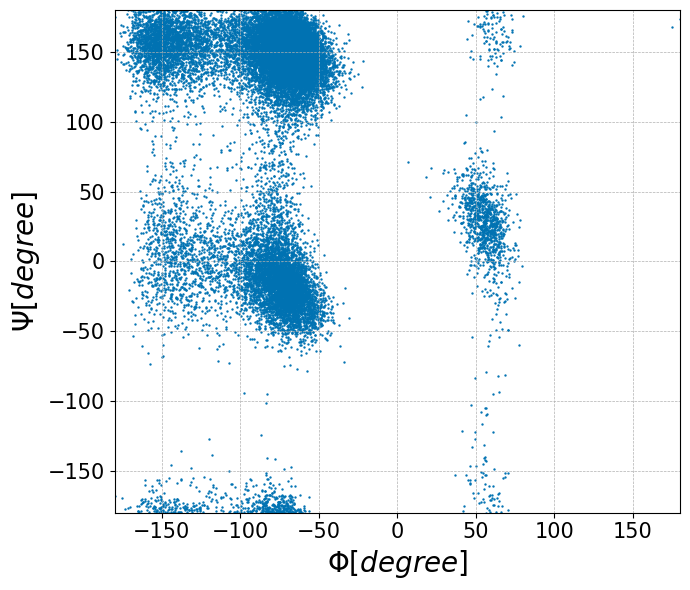

In [4]:
fig, ax = subplots(figsize=(7, 6));
ax.scatter(phi, psi, s=0.5);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (if your prefer to change details)
ax.set(xlim=[-180, 180], ylim=[-180, 180]);
ax.xaxis.set_tick_params(which="major",labelsize=15);
ax.yaxis.set_tick_params(which="major",labelsize=15);
ax.grid(linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface01.png", dpi=350);

In [5]:
grid_x = -180:1:180;
grid_y = -180:1:180;
pmf, grid_x, grid_y = compute_pmf(phi, psi, grid_x=grid_x, grid_y=grid_y, bandwidth=[2.0, 2.0], boxsize=[360.0, 360.0]);
KBT = KB_kcalpermol*300.0;
pmf = KBT .* pmf;

pmf

361×361 Matrix{Float64}:
 5.19818  5.16962  5.02327  4.58794  4.04907  3.57489  …  6.47349  5.93619  5.54744  5.30505  5.19818
 5.9452   5.63961  5.08423  4.45461  3.89908  3.45391     7.32602  6.78707  6.39436  6.13416  5.9452
 6.49204  5.76498  5.00436  4.33603  3.7889   3.36295     8.32093  7.77604  7.36103  6.99699  6.49204
 6.68768  5.78588  4.98661  4.31534  3.77254  3.35226     9.39141  8.81221  8.27933  7.5816   6.68768
 6.74538  5.86856  5.08184  4.41629  3.87486  3.45242     9.38433  8.80073  8.26792  7.5993   6.74538
 6.50756  5.89514  5.2263   4.61043  4.08889  3.67019  …  8.32641  7.77198  7.33912  6.96244  6.50756
 5.82914  5.52432  5.1344   4.71073  4.30916  3.95592     7.35515  6.80629  6.39255  6.08758  5.82914
 5.08907  4.89863  4.67567  4.44443  4.24825  4.09256     6.53259  5.98585  5.5785   5.29322  5.08907
 4.4589   4.32093  4.16798  4.01199  3.91002  3.89757     5.85882  5.31345  4.91004  4.63575  4.4589
 3.96558  3.86695  3.7657   3.65345  3.58479  3.61328     5

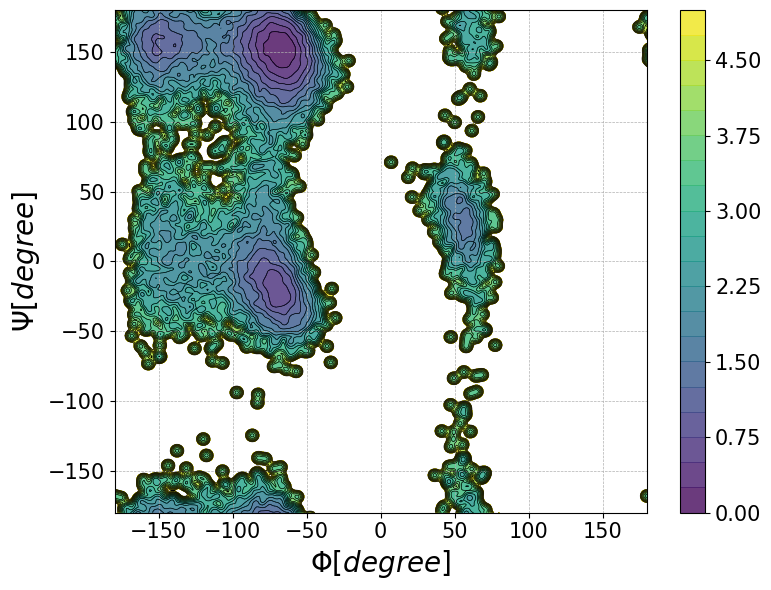

In [6]:
fig, ax = subplots(figsize=(8, 6));
meshgrid(x, y) = (repeat(x', length(y), 1), repeat(y, 1, length(x)));
X, Y = meshgrid(grid_x, grid_y);
levels = 0:0.25:5;
ax.contour(X, Y, pmf, levels, colors="black", alpha=1.0, linewidths=0.5);
pos = ax.contourf(X, Y, pmf, levels, alpha=0.8, cmap=get_cmap("viridis")) # colormaps: viridis, plasma, inferno, magma, jet, hsv, terrain
cbar = fig.colorbar(pos, ax=ax);
cbar.ax.tick_params(labelsize=15);
xlabel(L"\Phi [degree]",fontsize=20);
ylabel(L"\Psi [degree]",fontsize=20);

# detailed options (not necessary)
ax.set(xlim=[-180, 180], ylim=[-180, 180]);
ax.tick_params(axis="both", which="major",labelsize=15);
ax.grid(linestyle="--", linewidth=0.5);
tight_layout();

savefig("free_energy_surface02.png", dpi=350, bbox_inches="tight");